In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12

In [6]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

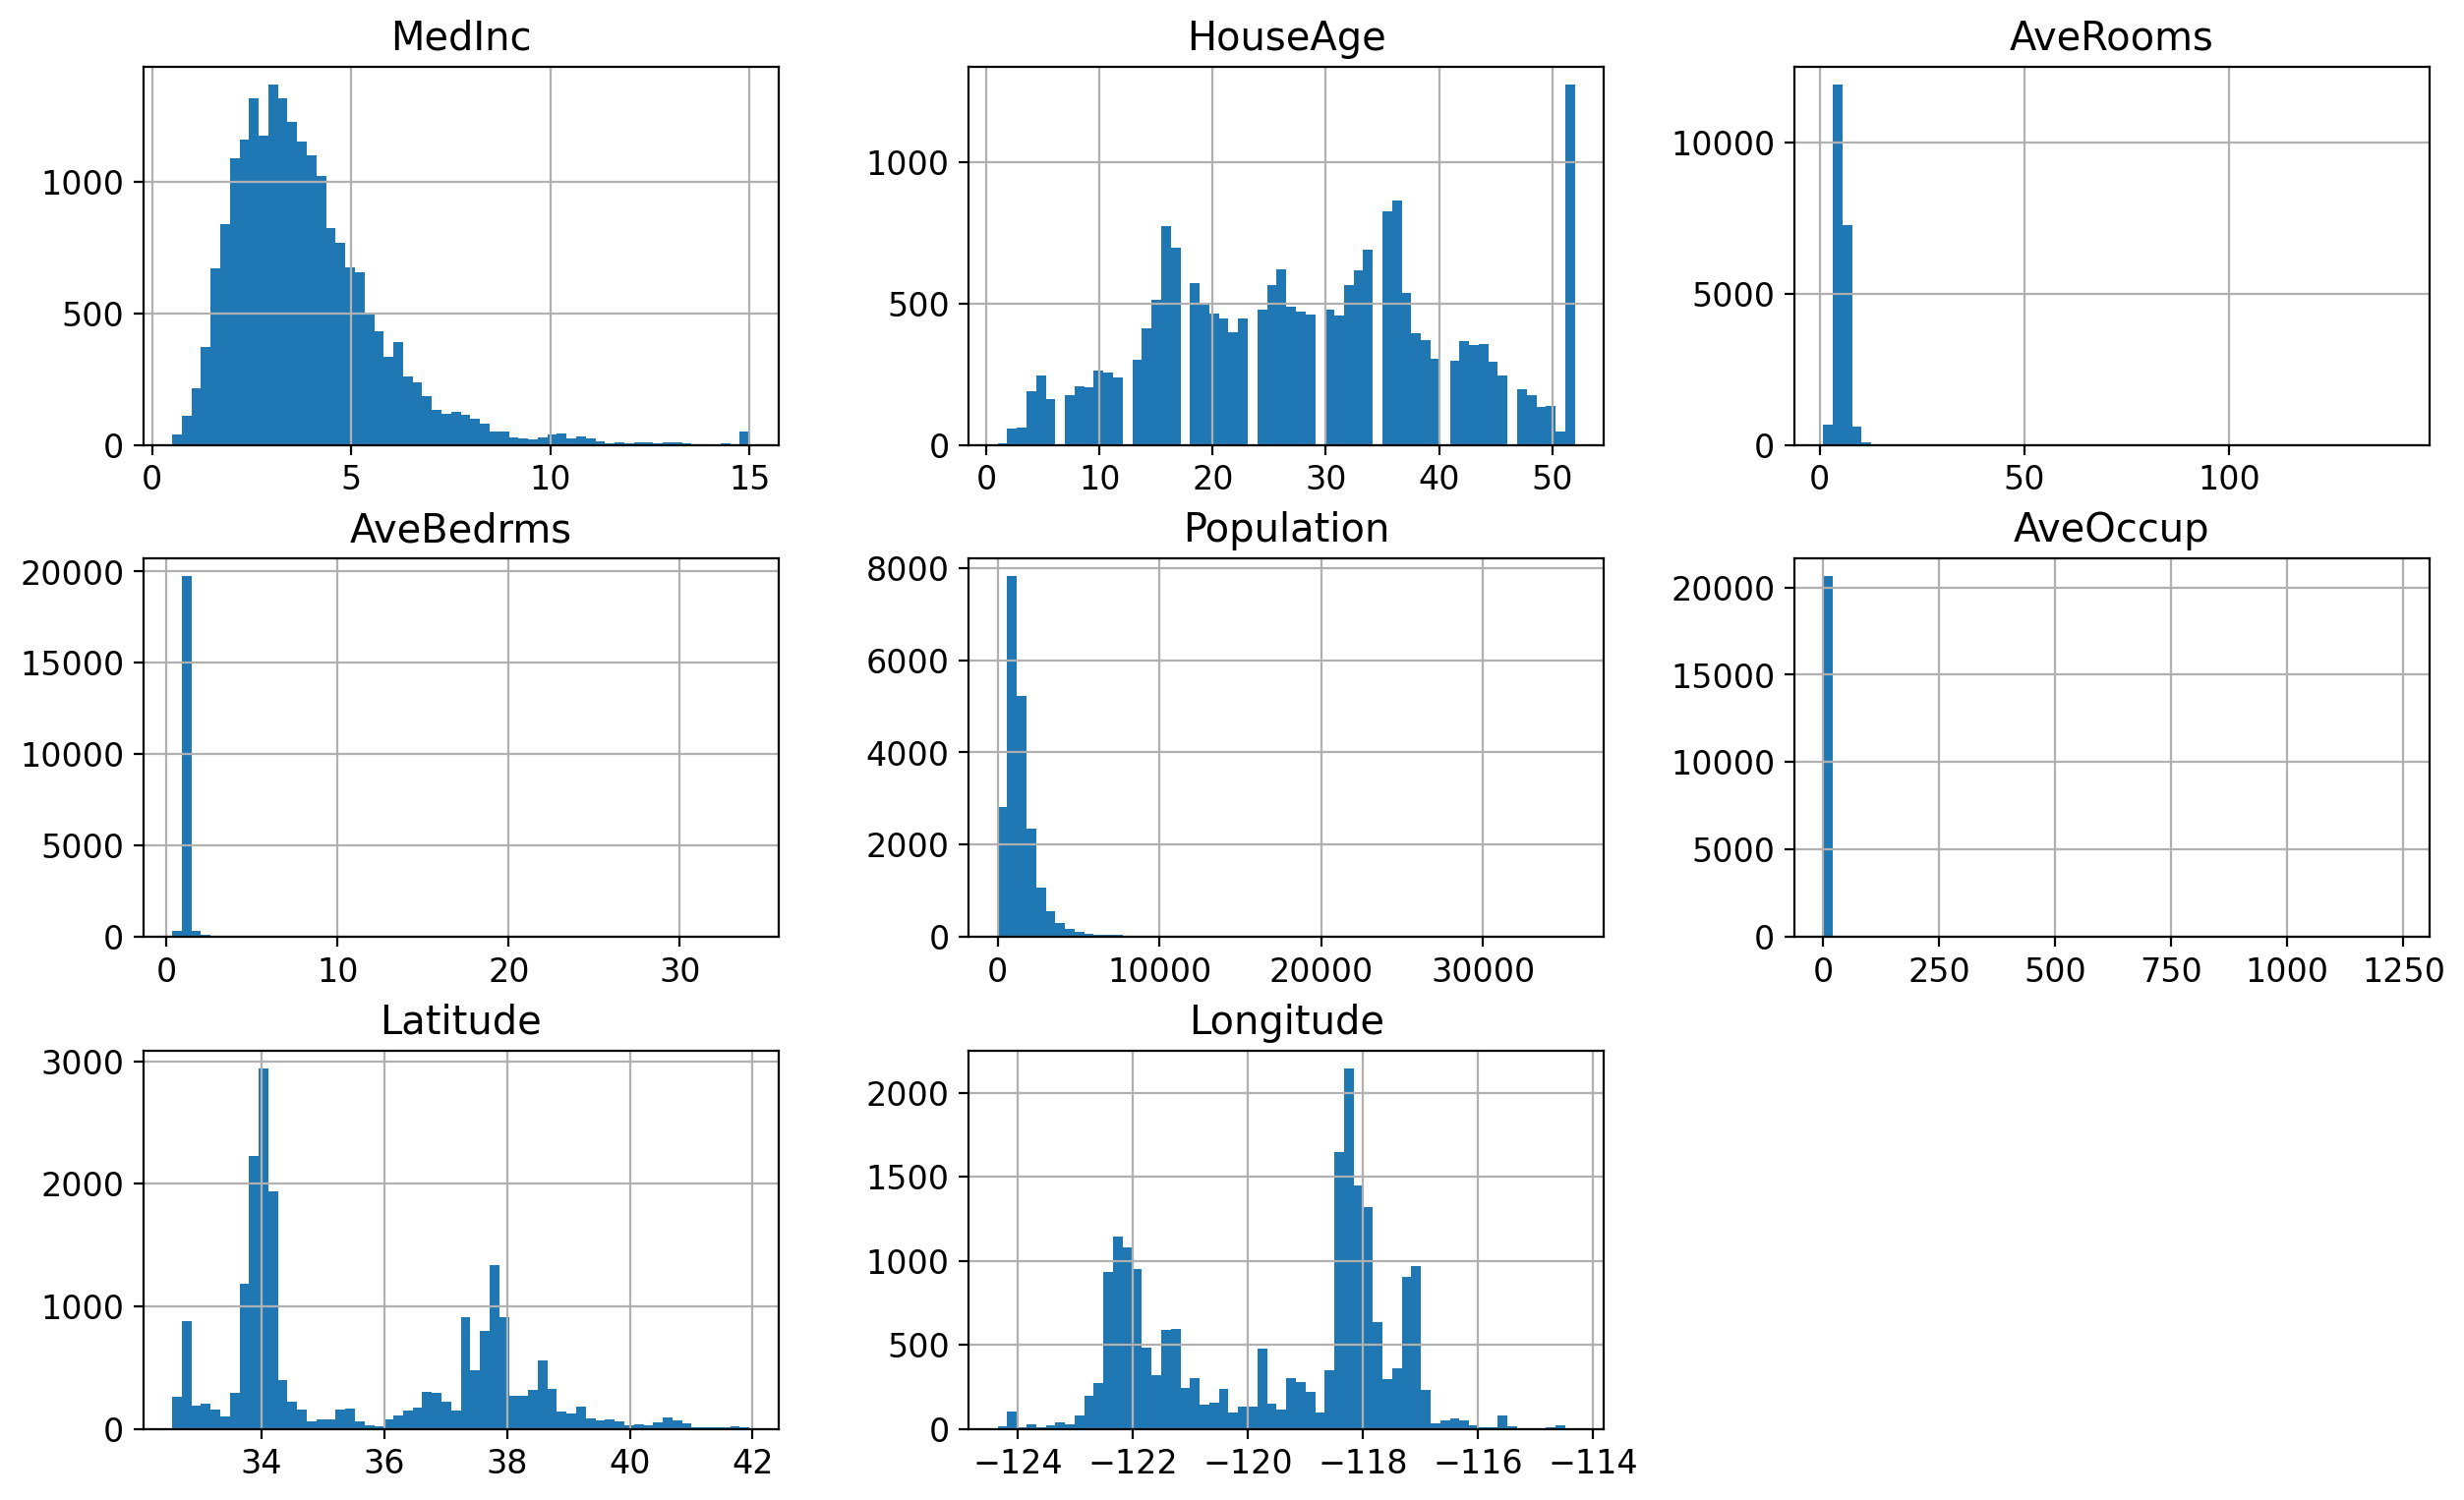

In [3]:
X.hist(bins=60, figsize=(15,9))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regression_model = BayesianRidge()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5555863660255017


In [7]:

# Создание и обучение модели Ridge регрессии, alpha - параметр регуляризации
alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge()

In [8]:

# Предсказание на тестовых данных

y_pred = ridge.predict(X_test)

In [9]:

# Подсчет MSE для разных alpha

alphas = [0.01, 0.1, 1, 10, 100]
mse_values = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

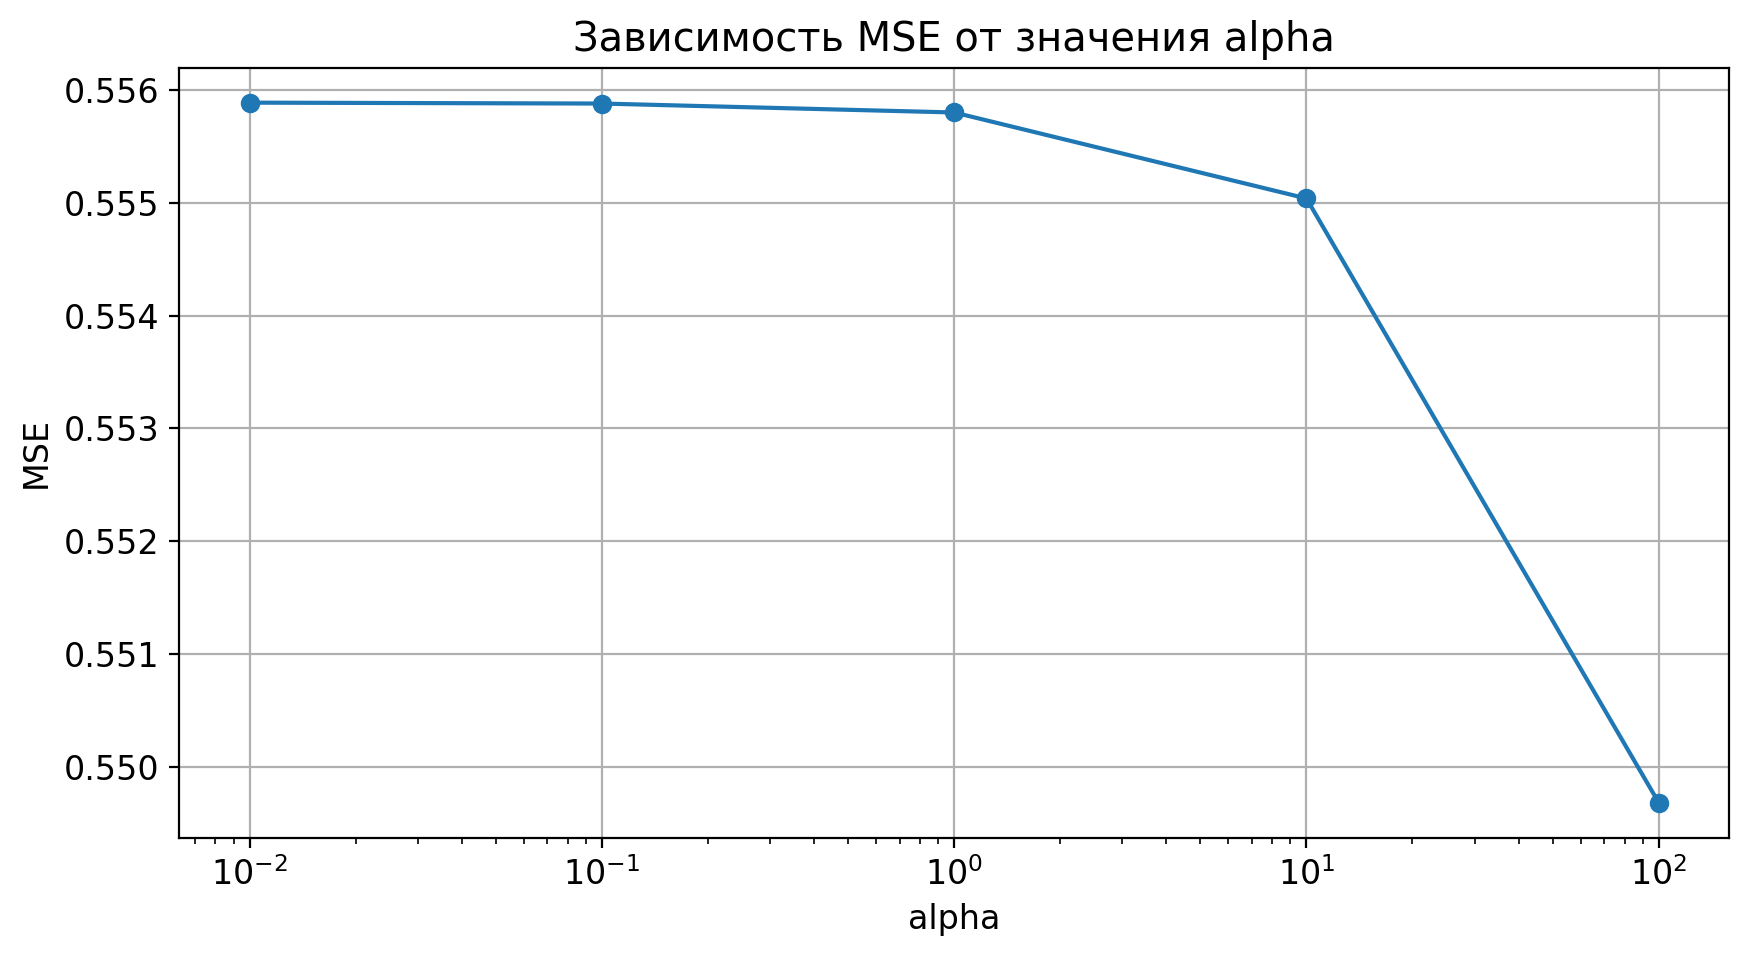

In [10]:
# Визуализация зависимости MSE от значений параметра регуляризации

plt.figure(figsize=(10, 5))
plt.plot(alphas, mse_values, marker='o')
plt.title('Зависимость MSE от значения alpha')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xscale('log')  # Используем логарифмическую шкалу для alpha
plt.grid()
plt.show()